# Setting & Import

In [7]:
import time
import sys
import os

# 현재 파일(main.ipynb)이 있는 디렉토리의 부모 디렉토리를 sys.path에 추가
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

In [2]:
# INFO 
from gameInfo import *
from hyperParams import *
from setDevice import *

# CODES
from state.ver1 import *
from network.resnet import *
from trainer.ver1 import *
from eval.ver1 import *
from selfplay.ver1 import *
from tester.nnVsHuman import *

In [4]:
fname = 'Jpub'
path = '/Users/ijimin/Documents/GitHub/AiGO/Omok/Jimin/model'

## Check

In [5]:
print(f"Using device: {device}")

Using device: mps


In [9]:
def convert_seconds(seconds):
    hours = seconds // 3600  # 1시간 = 3600초
    minutes = (seconds % 3600) // 60  # 남은 초에서 60으로 나눈 몫이 분
    remaining_seconds = seconds % 60  # 나머지가 초

    return hours, minutes, remaining_seconds

## Train

In [ ]:
start = time.time()

# model 정의
model = Network(N_RESIDUAL_BLOCK, N_KERNEL, STATE_SHAPE, N_ACTIONS)
model = model.to(device)
self_play = SelfPlay(model, SP_TEMPERATURE, TEMP_DISCOUNT, SP_GAME_COUNT, PV_EVALUATE_COUNT)
train = TrainNetwork(model, BATCH_SIZE, LEARNING_RATE, LEARN_DECAY, LEARN_EPOCH)
eval_network = EvalNetwork(model, EVAL_GAME_COUNT, EVAL_TEMPERATURE, PV_EVALUATE_COUNT, path, fname)

# 학습
for i in range(EPOCHS):
    print(f'\nTrain {i+1} --------------------------------')
    self_play()
    train(self_play.history, i)
    eval_network(train.model)

    if eval_network.updated:
        self_play.update_model(train.model)

    eval_network.save_model()

    seconds = time.time() - start
    h, m, s = convert_seconds(seconds)
    print(f"{i}번째 epoch 학습에 걸린 시간은, {h}시간 {m}분 {s}초 입니다. \n")

seconds = time.time() - start
h, m, s = convert_seconds(seconds)
print(f"학습에 걸린 시간은, {h}시간 {m}분 {s}초 입니다. ")


Train 1 --------------------------------
self play 50 / 500
self play 100 / 500


KeyboardInterrupt: 

In [12]:
None != 1

True

In [ ]:
# download hyper params 
with open(f"{path}/{fname}/hyperParams.txt", "w", encoding="utf-8") as file:
    file.write(hyper_params)

## Visualize

In [ ]:
plt.plot(train.losses)
plt.savefig(f"{path}/{fname}/loss.png", dpi=300, bbox_inches='tight')
plt.show()

In [5]:
model = Network(N_RESIDUAL_BLOCK, N_KERNEL, STATE_SHAPE, N_ACTIONS)
params = torch.load("/Users/ijimin/Documents/GitHub/AiGO/Omok/Jimin/model/trialbest_model_weight.pth", weights_only=False)
model.load_state_dict(params)

<All keys matched successfully>

,0,1,2
0,,,
1,,,
2,,,


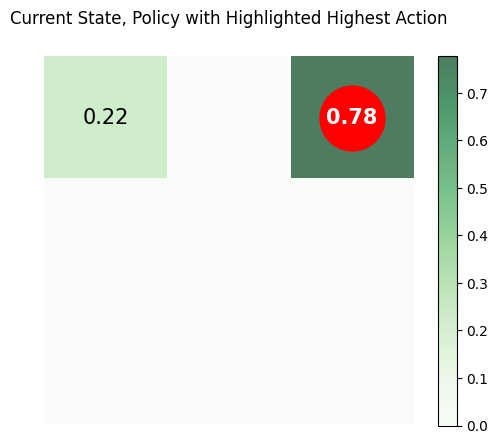

Alpha Zero's Action is : 2


,0,1,2
0,,,O
1,,,
2,,,


,0,1,2
0,,,O
1,,X,
2,,,


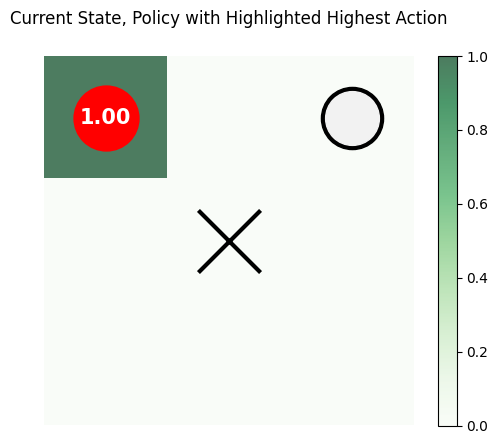

Alpha Zero's Action is : 0


,0,1,2
0,O,,O
1,,X,
2,,,


,0,1,2
0,O,X,O
1,,X,
2,,,


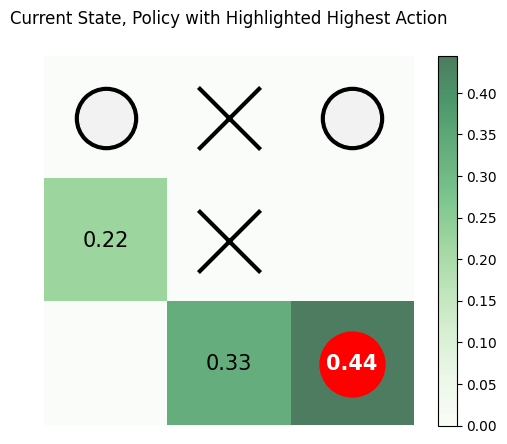

Alpha Zero's Action is : 7


,0,1,2
0,O,X,O
1,,X,
2,,O,


,0,1,2
0,O,X,O
1,X,X,
2,,O,


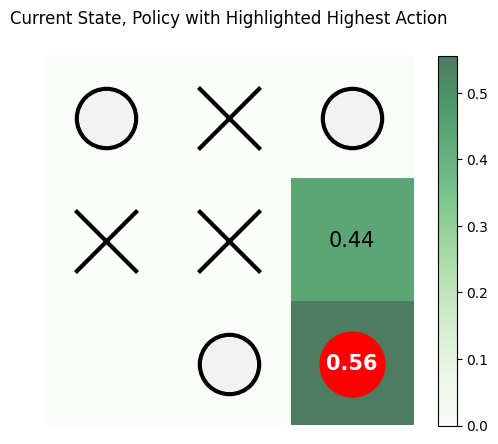

Alpha Zero's Action is : 5


,0,1,2
0,O,X,O
1,X,X,O
2,,O,


,0,1,2
0,O,X,O
1,X,X,O
2,,O,X


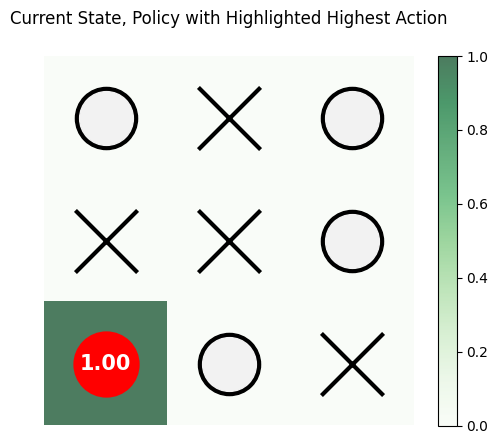

Alpha Zero's Action is : 6


,0,1,2
0,O,X,O
1,X,X,O
2,O,O,X


ValueError: invalid literal for int() with base 10: ''

In [6]:
# vs_human = ModelvsHuman(eval_network.best_model)

vs_human = ModelvsHuman(model)
vs_human()